Accuracy of KNN: 97.16312056737588


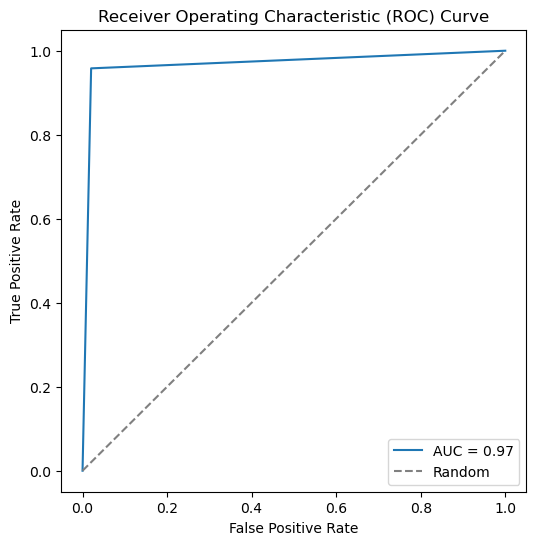

AUC-ROC of KNN: 96.8849620043768
Sensitivity: 0.96
Specificity: 0.98
Length of the dataset: 3525
0    2153
1    1372
Name: Class Label(GDM /Non GDM), dtype: int64
confusion_matrix


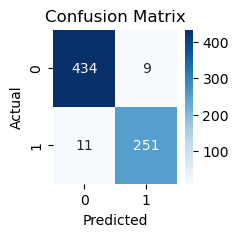

[0]


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from Excel
file_path = 'Gest1.xlsx'
df = pd.read_excel(file_path)

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])
        
# df.drop(columns=['Case Number'], inplace=True)
# df.head()

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Handling missing values
# df['BMI'].fillna(df['BMI'].mean(), inplace=True)
# df['OGTT'].fillna(df['OGTT'].mean(), inplace=True)
# df['HDL'].fillna(df['HDL'].mean(), inplace=True)
# df['Sys BP'].fillna(df['Sys BP'].mean(), inplace=True)
# df.fillna(df.mean(), inplace=True)

# df.to_csv("gest.csv")
# Display the first few rows of the DataFrame


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# print(y_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

#predicting the value

y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy*100}")

import pickle
pick_out= open("knn.pkl","wb")
pickle.dump(knn, pick_out)
pick_out.close()


from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, roc_auc_score
y_prob = knn.predict_proba(x_test)[:, 1]  # For binary classification, assuming knn has predict_proba method
auc_roc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC of KNN: {auc_roc*100}")


# Sensitivity and Specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

length_of_dataset = len(df)
print(f"Length of the dataset: {length_of_dataset}")

# Assuming you have a DataFrame df and the column of interest is 'heart_disease'
counts = df['Class Label(GDM /Non GDM)'].value_counts()

# Display the counts
print(counts)

# Print the confusion matrix
print('confusion_matrix')
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
from sklearn.metrics import confusion_matrix
# Plot confusion matrix as a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            # yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


z=knn.predict([[32,4,0,26,49,1,0,1,0,155,92,172,13.9,0,1]])#3481-0
print(z)


In [11]:
# print(df.describe())
df.head()

,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys_BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,22,2,1,27.854092,55.0,0,0,0,0,102.0,69,170.707503,12.0,0,0,0
1,26,2,1,27.854092,53.0,0,0,0,0,101.0,63,170.707503,12.4,0,0,0
2,29,1,0,27.854092,50.0,0,0,0,0,118.0,79,170.707503,14.3,0,0,0
3,28,2,1,27.854092,51.0,0,0,0,0,99.0,70,170.707503,15.0,0,0,0
4,21,2,1,27.854092,52.0,0,0,0,0,116.0,65,170.707503,15.0,0,0,0
